<a href="https://colab.research.google.com/github/kushal634/project/blob/main/vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving vehicle.csv to vehicle.csv


In [2]:
import pandas as pd

df = pd.read_csv("vehicle.csv")


In [3]:
print(df.head())          # Show first 5 rows
print(df.columns)         # Show column names
print(df.shape)           # Show (rows, columns)


                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

In [26]:
# -------- XGBoost Model Code --------
import pandas as pd
import numpy as np
from xgboost import XGBRegressor # Import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Load dataset
df = pd.read_csv("vehicle.csv")  # Update the path as needed

In [28]:
# Preprocessing
df = df.dropna(subset=['price', 'year', 'mileage'])  # Drop essential nulls
df.fillna('Unknown', inplace=True)

df['mileage'] = df['mileage'].astype(str).str.replace(',', '').str.extract('(\d+)')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['vehicle_age'] = 2025 - df['year']

df.drop(['name', 'description', 'engine', 'model'], axis=1, inplace=True)

/tmp/ipython-input-28-1787668193.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)
/tmp/ipython-input-28-1787668193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('Unknown', inplace=True)
/tmp/ipython-input-28-1787668193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(str).str.replace(',', ''

In [29]:
# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str) # Convert to string before encoding
    df[col] = le.fit_transform(df[col])

X = df.drop('price', axis=1)
y = df['price']

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost MAE: 4469.832237929894
XGBoost MSE: 57967697.56223075
XGBoost RMSE: 7613.652051560457
XGBoost R² Score: 0.8310067757212394


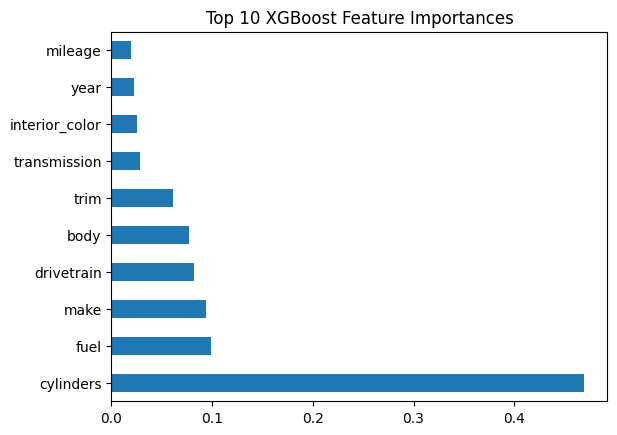

In [31]:
# Optional: XGBoost Feature Importance Plot
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance_xgb.nlargest(10).plot(kind='barh')
plt.title("Top 10 XGBoost Feature Importances")
plt.show()